In [1]:
#Selenium

Scraping Time for Selenium (including opening and closing browser): 21.055023193359375 seconds
Scraping Time for Selenium (just scraping the data): 4.234246730804443 seconds
(100, 5)
                                           Book Name              Author  \
0  I Don't Love You Anymore: Moving On and Living...       Rithvik Singh   
1  MINtile Sank Magic Practice Copybook, (4 Book ...          Sank Magic   
2  My First Library: Boxset of 10 Board Books for...  Wonder House Books   
3  The Satvic Revolution: 7 Life-changing Habits ...         Subah Saraf   
4                         Amma Diarylo Konni Pageelu         Ravi Mantri   

               Rating Customers Rated    Price  
0  4.1 out of 5 stars             195  ₹249.00  
1  4.0 out of 5 stars           2,273   ₹93.00  
2  4.5 out of 5 stars          78,676  ₹399.00  
3  4.6 out of 5 stars              10  ₹331.00  
4  4.9 out of 5 stars             327  ₹200.00  
Book Name          0
Author             0
Rating             1
Cus

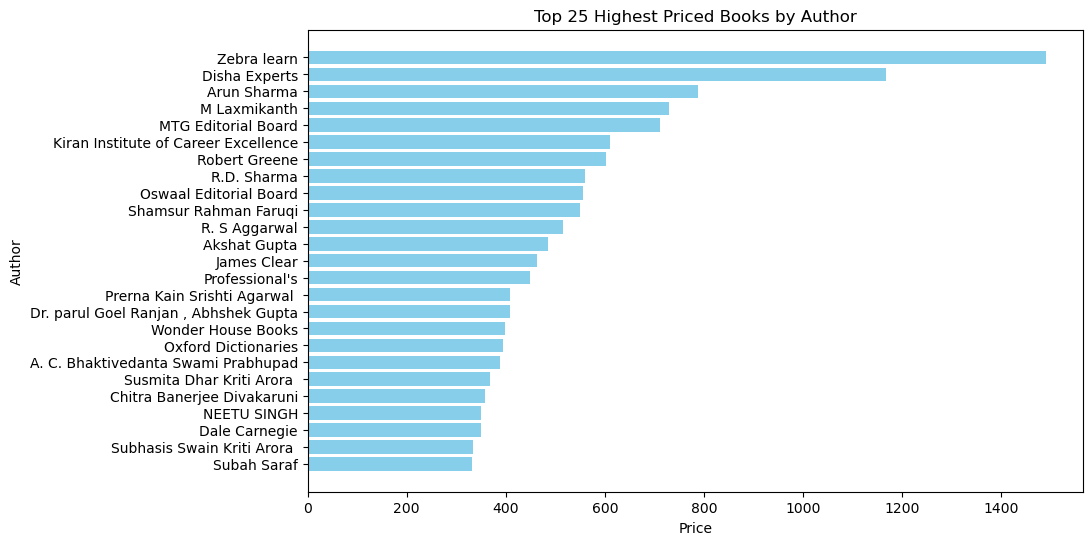

                                            Book Name  \
49  CLASS 3 OUR WONDROUS WORLD THE WORLD AROUND US...   
70                                      The Right Guy   
4                          Amma Diarylo Konni Pageelu   
20            Shrimad Bhagwat Geeta Yatharoop (Hindi)   
90  CLASS 6 POORVI TEXTBOOK OF ENGLISH CLASS 6 NCE...   
78          Bhagvad Gita As It Is English New Edition   
76          Bhagvad Gita As It Is English New Edition   
97  Shlokas and Mantras For Kids Illustrated Padde...   
47  Bhagavad Gita [Deluxe Hardbound Edition] Sacre...   
64                                      The Alchemist   
32                     The Magic Of The Lost Temple**   
33  Indian Polity for UPSC (English)|7th Edition|C...   
39  Courage To Be Disliked, The: How to free yours...   
46             11 Rules For Life: Secrets to Level Up   
50    THE 48 LAWS OF POWER [Paperback] Greene, Robert   
75  MTG International Mathematics Olympiad (IMO) W...   
26                 The Naga War

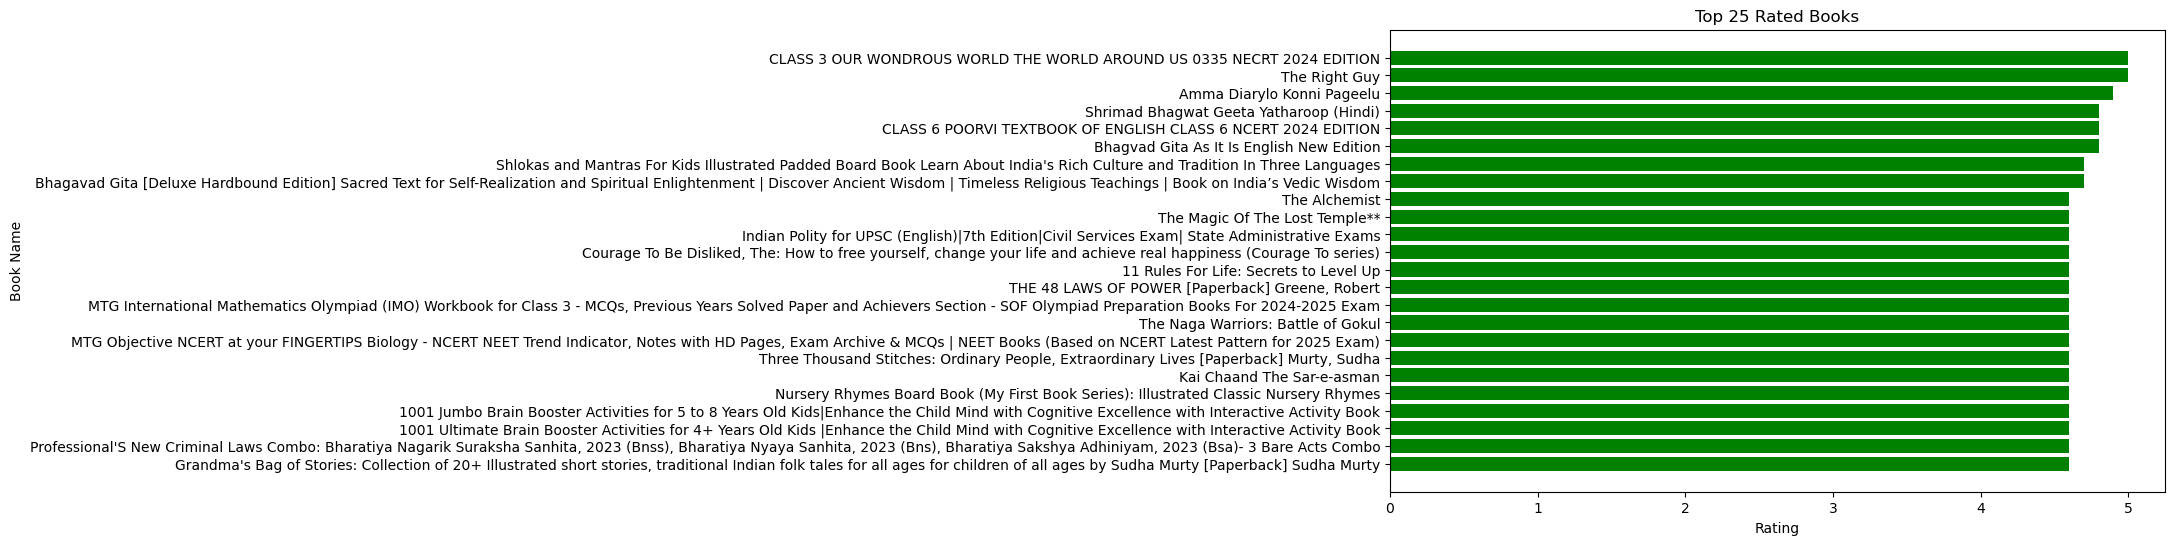

                                            Book Name              Author  \
25   THE SILENT PATIENT [Paperback] Michaelides, Alex    Alex Michaelides   
64                                      The Alchemist        Paulo Coelho   
6                                       Atomic Habits         James Clear   
2   My First Library: Boxset of 10 Board Books for...  Wonder House Books   
62      Think and Grow Rich: THE 21st CENTURY EDITION       Napoleon Hill   
41                The Power of Your Subconscious Mind       Joseph Murphy   
8                             The Psychology of Money       Morgan Housel   
11                                             Ikigai   Francesc Miralles   
35                                      The 5 AM Club        Robin Sharma   
44  Rich Dad Poor Dad : What the Rich Teach Their ...  Robert T. Kiyosaki   
77  Deep Work: Rules for Focused Success in a Dist...         Cal Newport   
9   My First Book of Patterns Pencil Control: Patt...  Wonder House Books   

In [4]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service as EdgeService
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from bokeh.palettes import d3
from bokeh.plotting import figure, show, output_file
from bokeh.models import NumeralTickFormatter

# 1. Import Necessary Libraries
# (Already done above)

# 2. Scraping the Amazon Best Selling Books (100 Books)
url_list = [
    'https://www.amazon.in/gp/bestsellers/books/ref=zg_bs_pg_1',
    'https://www.amazon.in/gp/bestsellers/books/ref=zg_bs_pg_2_books?ie=UTF8&pg=2'
]

# Function to scrape data using Selenium
def scrap_selenium():
    scrape_start_time = time.time()  # Start timer for scraping (including opening and closing browser)
    books_data = []

    for url in url_list:
        edge_options = webdriver.EdgeOptions()
        edge_options.add_argument("--inprivate")
        driver = webdriver.Edge(service=EdgeService(EdgeChromiumDriverManager().install()), options=edge_options)
        driver.get(url)
        driver.implicitly_wait(10)

        # Start timer for just scraping the data
        data_scrape_start_time = time.time()
        
        # Scroll to the bottom of the page to load all content
        prev_height = driver.execute_script("return document.body.scrollHeight")
        while True:
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(2)
            new_height = driver.execute_script("return document.body.scrollHeight")
            if new_height == prev_height:
                break
            prev_height = new_height

        # Get the HTML content of the page
        html_content = driver.page_source
        soup = BeautifulSoup(html_content, 'html.parser')

        # Extract book data from the parsed HTML
        for book in soup.find_all('div', class_='p13n-sc-uncoverable-faceout'):
            try:
                book_name = book.find('div', class_='_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y').text
            except:
                book_name = np.nan
            try:
                author = book.find('div', class_='a-row a-size-small').text
            except:
                author = np.nan
            try:
                rating = book.find('i').text
            except:
                rating = np.nan
            try:
                customer_rated = book.select_one('div.a-icon-row span.a-size-small').text
            except:
                customer_rated = np.nan
            try:
                price = book.find('span', class_='_cDEzb_p13n-sc-price_3mJ9Z').text
            except:
                price = np.nan
            books_data.append([book_name, author, rating, customer_rated, price])

        driver.close()
        
        # End timer for just scraping the data
        data_scrape_end_time = time.time()

    # 3. Using collected data create a CSV file (amazon_book_selenium.csv)
    df = pd.DataFrame(books_data, columns=['Book Name', 'Author', 'Rating', 'Customers Rated', 'Price'])
    file_name = 'amazon_book_selenium.csv'
    df.to_csv(file_name, index=False)

    scrape_end_time = time.time()  # End timer for scraping (including opening and closing browser)
    print(f'Scraping Time for Selenium (including opening and closing browser): {scrape_end_time - scrape_start_time} seconds')
    print(f'Scraping Time for Selenium (just scraping the data): {data_scrape_end_time - data_scrape_start_time} seconds')

    preprocess(file_name)
    end_time = time.time()
    print(f'Processing Time for Selenium (Full Script): {end_time - full_start_time} seconds')

# 4. Reading the CSV File; and show the size, and head of the CSV file
def preprocess(file):
    data = pd.read_csv(file)
    print(data.shape)
    print(data.head())

    # 5. EDA on the collected CSV data:
    # Pre-processing on the Rating, Customers_Rated, and Price column.
    # Example:
    # Rating: should be a number only.
    # Customer_rated: comma should be taken out and it should be an integer (how many customers rated this book)
    # Price: comma and symbols should be taken out and it should also be a number

    # Drop rows where both 'Price' and 'Rating' are NaN
    data = data.dropna(subset=['Price', 'Rating'], how='all')

    # Ensure 'Price' is treated as string before replacing and converting
    data['Price'] = data['Price'].astype(str)

    # Replace '₹' and ',' in 'Price', then convert to float
    data['Price'] = data['Price'].str.replace('₹', '').str.replace(',', '').astype(float)

    # Convert 'Rating' to float
    data['Rating'] = data['Rating'].str.extract(r'(\d\.\d)').astype(float)

    # Fill NaNs in 'Customers Rated' with 0 and convert to int
    data['Customers Rated'] = data['Customers Rated'].str.replace(',', '').fillna('0').astype(int)

    print(data.isna().sum())
    print(data)

    # 6. Check NaNs and take care of NaNs (May be drop the NaNs)
    # (Already handled above by dropping rows where both 'Price' and 'Rating' are NaN)

    # 7. List the Authors Highest Priced Book (i.e., based on price): show your result (at least top 25 highest priced book) as a data frame as well as a Bar diagram.
    highest_priced_books = data.groupby('Author').agg({'Price': 'max'}).reset_index()
    highest_priced_books = highest_priced_books.sort_values(by='Price', ascending=False).head(25)
    print(highest_priced_books)

    plt.figure(figsize=(10, 6))
    plt.barh(highest_priced_books['Author'], highest_priced_books['Price'], color='skyblue')
    plt.xlabel('Price')
    plt.ylabel('Author')
    plt.title('Top 25 Highest Priced Books by Author')
    plt.gca().invert_yaxis()
    plt.show()

    # 8. Show top Rated Books and Authors with respect to the highest customers rating (i.e., based on rating score): Show your result as a data frame as well as a Bar diagram.
    top_rated_books = data.sort_values(by='Rating', ascending=False).head(25)
    print(top_rated_books)

    plt.figure(figsize=(10, 6))
    plt.barh(top_rated_books['Book Name'], top_rated_books['Rating'], color='green')
    plt.xlabel('Rating')
    plt.ylabel('Book Name')
    plt.title('Top 25 Rated Books')
    plt.gca().invert_yaxis()
    plt.show()

    # 9. Show topmost (10/15) Customer Rated Authors and Books (i.e., based on number of customers): Show your result as a data frame as well as a bokeh.palettes, d3
    # (https://docs.bokeh.org/en/latest/docs/reference/palettes.html)
    top_customer_rated_books = data.sort_values(by='Customers Rated', ascending=False).head(15)
    print(top_customer_rated_books)

    output_file("top_customer_rated_books_selenium.html")
    p = figure(y_range=top_customer_rated_books['Book Name'], height=800, width=1200, title="Top 15 Customer Rated Books",
               toolbar_location=None, tools="")
    p.hbar(y=top_customer_rated_books['Book Name'], right=top_customer_rated_books['Customers Rated'], height=0.4, color=d3['Category20'][15])
    p.xaxis.axis_label = "Customers Rated"
    p.yaxis.axis_label = "Book Name"
    p.ygrid.grid_line_color = None
    p.xaxis.formatter = NumeralTickFormatter(format="0,0")

    show(p)

# 10. Complete the above tasks using at least three separate web scraping packages and compare their performance (processing time).
if __name__ == "__main__":
    full_start_time = time.time()  # Start timer for the full script
    scrap_selenium()


